# Práctica 4

## Ejercicio 2

## Autores : Jorge Martín Pastor y Juan Serrano Vara

## 5 dic 2018

<h1 align = "center" style="background-color:powderblue;"> Importamos las librerias</h1>

In [38]:
%reset
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from sklearn import metrics
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st 
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<h1 align = "center" style="background-color:powderblue;"> Importamos los Datos</h1>

In [39]:
Articulos = pd.read_csv("P2/articulos.csv")
Articulos

,palabras,links,comentarios,multimedia,días,compartido
0,1742,9,NaN,9,5,25000
1,962,6,0.0,1,10,42000
2,1221,3,NaN,2,68,200000
3,2039,1,104.0,4,131,200000
4,761,0,NaN,1,14,21000
5,6462,600,28.0,2,170,200000
6,753,3,0.0,1,78,77000
7,1118,2,NaN,1,62,59400
8,1581,4,NaN,2,60,35000
9,2090,1,95.0,1,267,100000


<h1 align = "center" style="background-color:powderblue;">Preprocesamiento de los datos</h1>

### Eliminamos los NaN

In [40]:
Articulos = Articulos.dropna()

ArticulosX = Articulos.drop('compartido',1)
ArticulosX

,palabras,links,comentarios,multimedia,días
1,962,6,0.0,1,10
3,2039,1,104.0,4,131
5,6462,600,28.0,2,170
6,753,3,0.0,1,78
9,2090,1,95.0,1,267
12,256,0,27.0,1,95
16,635,3,1.0,2,12
17,1631,6,6.0,9,180
22,1135,8,0.0,1,146
23,666,4,0.0,3,18


<h1 style="background-color:powderblue;">EJERCICIO 1</h1>

### Realizamos regresión lineal múltiple

In [41]:
# Creamos un nuevo objeto de Regresión Lineal
Reg_Multiple = linear_model.LinearRegression()

#Entrenamos el modelo para obtener la ecuación de la recta
Reg_Multiple.fit(ArticulosX, Articulos['compartido'])

# Calculamos el intercepto
print('Intercept: \n', Reg_Multiple.intercept_)

# Calculamos Los coeficientes
print('\nCoefficients: \n', Reg_Multiple.coef_)

# Ecuación de la recta
print('\nEcuación:\n\nY =',Reg_Multiple.intercept_,'+',Reg_Multiple.coef_[0],'* Palabras +',Reg_Multiple.coef_[1],'* links +',Reg_Multiple.coef_[2],'* comentarios +',Reg_Multiple.coef_[3],'* multimedia +',Reg_Multiple.coef_[4],'* dias')


Intercept: 
 7947.32237489066

Coefficients: 
 [   7.03297282  210.0228989  1183.96128108 -866.5659979   -83.39804556]

Ecuación:

Y = 7947.32237489066 + 7.0329728202223505 * Palabras + 210.02289890465337 * links + 1183.9612810802928 * comentarios + -866.5659979033974 * multimedia + -83.39804555595973 * dias


### Interpretación del modelo

El coefciente de valor 1183 significará que manteniendo fijas todas las variables (excepto link) aumentando un link se predecirá un aumento de 1183 en la variable compartido. Es decir, por cada link que añadamos tendremos un total de 1183 veces mas que se comparte la página. Este razonamiento será válido para el resto de variables.

Las variables más significativas son links y multimedia


### Dibujo del modelo teniendo en cuenta las variables más influyentes. 

La variable más influyente es el número de comentarios

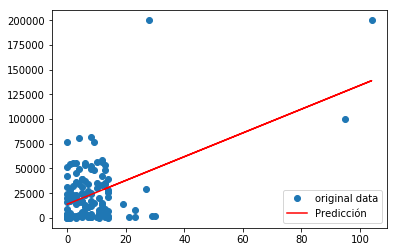

In [52]:
#Entrenamos el modelo para obtener la ecuación de la recta
X = np.array(Articulos['comentarios']).reshape(-1, 1)
Y = np.array(Articulos['compartido']).reshape(-1, 1)

Reg_Multiple.fit(X, Y)

plt.plot(X, Y, 'o', label='original data')
plt.plot(X, Reg_Multiple.coef_*X+Reg_Multiple.intercept_, 'r', label='Predicción')

plt.legend()
plt.show()

In [ ]:
Y = 7947.32237489066 + 1183.9612810802928 * comentarios + -866.5659979033974 * multimedia + -83.39804555595973 * dias

<h1 style="background-color:powderblue;">EJERCICIO 2</h1>

# Análisis de residuos del modelo 

Residuo = SalidaReal-Predecida

In [43]:
z_pred = Reg_Multiple.predict(pred)
compartido =np.array(Articulos['compartido'])

Residuo = compartido-z_pred
Residuo

array([ 2.77273668e+04,  6.87618579e+04,  3.35175179e+03,  7.04983939e+04,
       -1.21987360e+04, -3.92533768e+03, -8.29338155e+03,  3.20287361e+04,
        1.54327509e+04, -6.97051106e+03, -6.40327381e+03, -9.01509388e+03,
       -1.48517804e+04, -2.26917533e+04, -1.99078731e+04, -3.87997276e+04,
       -2.05803405e+03, -6.85723176e+03,  8.97525299e+02, -5.75818166e+03,
       -9.89108842e+03, -4.29679927e+04,  1.87265436e+03, -2.65163026e+04,
        9.20154834e+03, -2.66366316e+04, -2.81269369e+04, -3.20681163e+04,
       -2.15110537e+03, -2.41941915e+04,  3.42165759e+03,  1.34860463e+04,
       -1.34884373e+03,  1.07513569e+04,  8.84358976e+03, -7.57815101e+03,
       -1.87713294e+04, -5.00812761e+03, -1.59664811e+04, -5.34438538e+03,
        7.69807356e+03, -1.99583377e+04,  5.45943677e+03, -9.88387198e+03,
        2.39686370e+04,  1.61623284e+03,  2.10759245e+04,  1.66513640e+04,
       -2.68581803e+04, -1.95306547e+04,  7.51848372e+03,  2.22442512e+04,
        3.59617715e+04, -

Observamos que el la diferencia entre el valor esperado y el obtenido es muy grande por lo cual podemos decir que nuestro modelo no precide bien.

<h1 style="background-color:powderblue;">EJERCICIO 3</h1>

# Utiliza los intervalos de confianza para obtener la mayor información posible con ellos

In [44]:
st.t.interval(0.95,len(Articulos['compartido'])-1,loc=np.mean(Articulos['compartido']),scale=st.sem(Articulos['compartido']))

(19127.239780204938, 29926.588344795062)

Con un 95 % de confianza podemos por cada valor de X se asegura que Y se incrementa por término medio entre (19127.239780204938, 29926.588344795062).

<h1 align = "center" style="background-color:powderblue;">Bibliografía</h1>

https://stackoverrun.com/es/q/4074939

http://contrib.scikit-learn.org/forest-confidence-interval/

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9